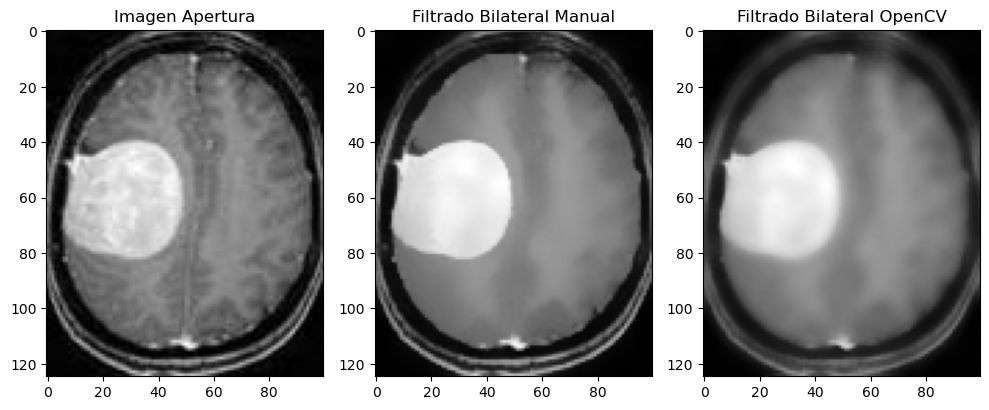

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_bilateral_filter(image, d, sigma_color, sigma_space):
    # Obtener dimensiones de la imagen
    height, width = image.shape

    # Crear una imagen vacía para almacenar el resultado del filtrado bilateral
    filtered_image = np.zeros_like(image)

    # Definir el tamaño de la ventana del vecindario
    half_window = d // 2

    # Iterar sobre todos los píxeles de la imagen
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]

            # Definir los límites de la ventana del vecindario
            i_min = max(i - half_window, 0)
            i_max = min(i + half_window + 1, height)
            j_min = max(j - half_window, 0)
            j_max = min(j + half_window + 1, width)

            # Inicializar el píxel filtrado
            filtered_pixel = 0.0
            total_weight = 0.0

            # Iterar sobre los píxeles en el vecindario
            for k in range(i_min, i_max):
                for l in range(j_min, j_max):
                    neighbor = image[k, l]

                    # Calcular la diferencia de color
                    color_diff = abs(int(neighbor) - int(pixel))

                    # Calcular la diferencia de posición
                    position_diff = np.sqrt((k - i) ** 2 + (l - j) ** 2)

                    # Calcular el peso del vecino en función de las diferencias de color y posición
                    weight = np.exp(-color_diff**2 / (2 * sigma_color**2) - position_diff**2 / (2 * sigma_space**2))

                    # Acumular el peso en el total
                    total_weight += weight

                    # Acumular el valor del vecino ponderado por el peso
                    filtered_pixel += neighbor * weight

            # Normalizar el valor filtrado dividiendo por el total de pesos
            filtered_pixel /= total_weight

            # Asignar el valor filtrado al píxel correspondiente en la imagen filtrada
            filtered_image[i, j] = filtered_pixel

    return filtered_image

# Cargar la imagen en blanco y negro
imagen = cv2.imread('yes_nuevo/Y1.jpg', 0)

# Parámetros del filtrado bilateral
d = 9
sigma_color = 75
sigma_space = 75

# Aplicar filtrado bilateral manual
imagen_filtrada_manual = manual_bilateral_filter(imagen, d, sigma_color-50, sigma_space-60)

# Aplicar filtrado bilateral con OpenCV
imagen_filtrada_opencv = cv2.bilateralFilter(imagen, d, sigma_color, sigma_space)

# Comparar las imágenes filtradas
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Apertura')

plt.subplot(132)
plt.imshow(imagen_filtrada_manual, cmap='gray')
plt.title('Filtrado Bilateral Manual')

plt.subplot(133)
plt.imshow(imagen_filtrada_opencv, cmap='gray')
plt.title('Filtrado Bilateral OpenCV')

plt.tight_layout()
plt.show()


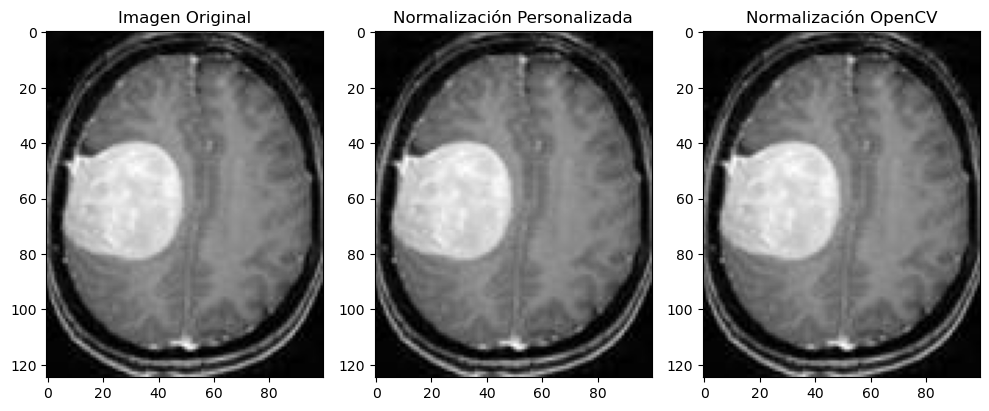

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_normalize(image):
    # Obtener el valor mínimo y máximo de la imagen
    min_val = np.min(image)
    max_val = np.max(image)

    # Escalar la imagen al rango [0, 255]
    normalized_image = ((image - min_val) / (max_val - min_val)) * 255

    return normalized_image.astype(np.uint8)

# Cargar la imagen en blanco y negro
imagen = cv2.imread('yes_nuevo/Y1.jpg', 0)

# Normalizar la imagen con la función personalizada
imagen_normalizada_custom = custom_normalize(imagen)

# Normalizar la imagen con la función cv2.normalize
imagen_normalizada_cv2 = cv2.normalize(imagen, None, 0, 255, cv2.NORM_MINMAX)

# Comparar las imágenes normalizadas
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(imagen_normalizada_custom, cmap='gray')
plt.title('Normalización Personalizada')

plt.subplot(133)
plt.imshow(imagen_normalizada_cv2, cmap='gray')
plt.title('Normalización OpenCV')

plt.tight_layout()
plt.show()


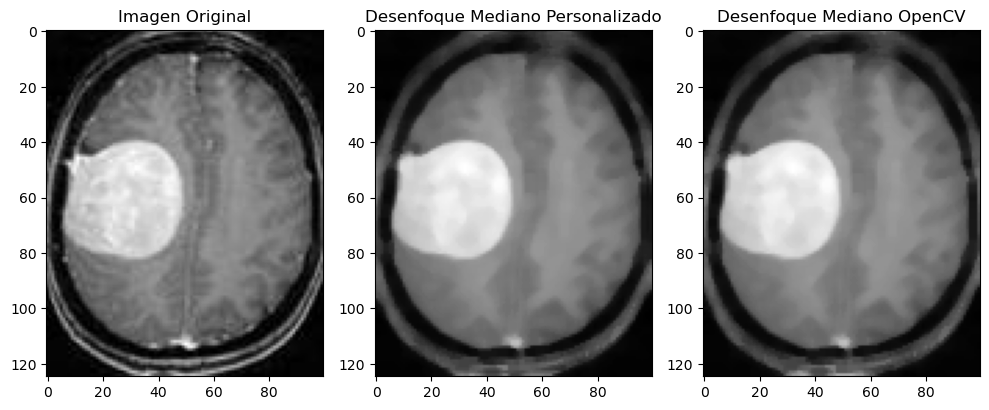

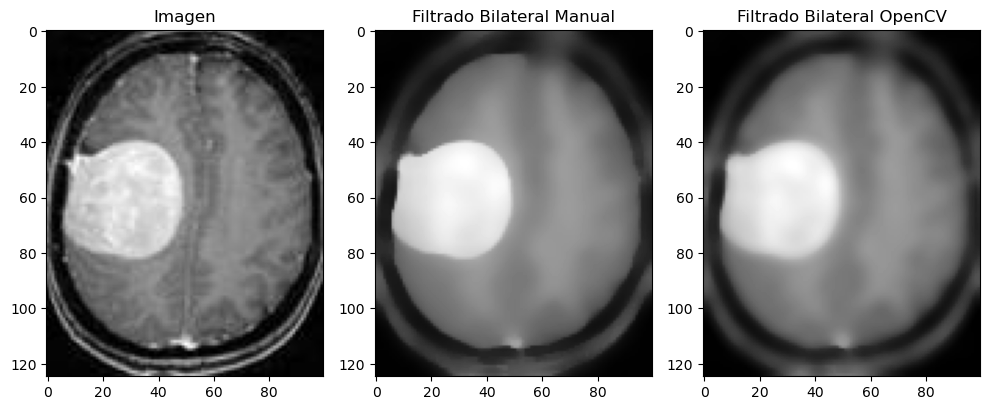

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_median_blur(image, kernel_size):
    # Obtener dimensiones de la imagen
    height, width = image.shape

    # Crear una imagen vacía para almacenar el resultado del desenfoque mediano
    blurred_image = np.zeros_like(image)

    # Definir el tamaño del vecindario
    half_kernel = kernel_size // 2

    # Iterar sobre todos los píxeles de la imagen
    for i in range(height):
        for j in range(width):
            # Definir los límites del vecindario
            i_min = max(i - half_kernel, 0)
            i_max = min(i + half_kernel + 1, height)
            j_min = max(j - half_kernel, 0)
            j_max = min(j + half_kernel + 1, width)

            # Obtener los valores de los píxeles en el vecindario
            neighborhood = image[i_min:i_max, j_min:j_max]

            # Calcular el valor mediano del vecindario
            median_value = np.median(neighborhood)

            # Asignar el valor mediano al píxel correspondiente en la imagen desenfocada
            blurred_image[i, j] = median_value

    return blurred_image.astype(np.uint8)

# Cargar la imagen en blanco y negro
imagen = cv2.imread('yes_nuevo/Y1.jpg', 0)

# Aplicar desenfoque mediano con la función personalizada
imagen_blur_custom = custom_median_blur(imagen, 5)

# Aplicar desenfoque mediano con la función cv2.medianBlur
imagen_blur_cv2 = cv2.medianBlur(imagen, 5)

# Comparar las imágenes desenfocadas
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(imagen_blur_custom, cmap='gray')
plt.title('Desenfoque Mediano Personalizado')

plt.subplot(133)
plt.imshow(imagen_blur_cv2, cmap='gray')
plt.title('Desenfoque Mediano OpenCV')

plt.tight_layout()
plt.show()

imagen = cv2.imread('yes_nuevo/Y1.jpg', 0)

# Normalizar la imagen con la función personalizada
imagen_normalizada_custom = custom_normalize(imagen)
# Normalizar la imagen con la función cv2.normalize
imagen_normalizada_cv2 = cv2.normalize(imagen, None, 0, 255, cv2.NORM_MINMAX)


imagen_blur_custom = custom_median_blur(imagen_normalizada_custom, 5)
# Aplicar desenfoque mediano con la función cv2.medianBlur
imagen_blur_cv2 = cv2.medianBlur(imagen_normalizada_cv2, 5)

d = 9
sigma_color = 75
sigma_space = 75

# Aplicar filtrado bilateral manual
imagen_filtrada_manual = manual_bilateral_filter(imagen_blur_custom, d, sigma_color-35, sigma_space)
# Aplicar filtrado bilateral con OpenCV
imagen_filtrada_opencv = cv2.bilateralFilter(imagen_blur_cv2, d, sigma_color, sigma_space)


plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen')

plt.subplot(132)
plt.imshow(imagen_filtrada_manual, cmap='gray')
plt.title('Filtrado Bilateral Manual')

plt.subplot(133)
plt.imshow(imagen_filtrada_opencv, cmap='gray')
plt.title('Filtrado Bilateral OpenCV')

plt.tight_layout()
plt.show()


In [14]:
def obtener_espejo(imagen):
    
    # Obtener las dimensiones de la imagen

    alto, ancho = imagen.shape




    # Crear una matriz vacía para el espejo

    espejo = np.empty_like(imagen)

    # Obtener el espejo de la imagen

    for fila in range(alto):

        espejo[fila, :] = imagen[fila, ::-1]




    return espejo

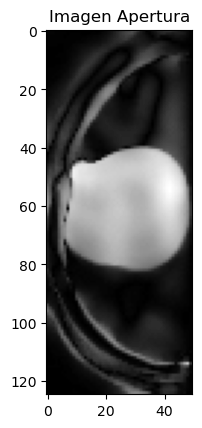

In [15]:
import numpy as np
from scipy.stats import pearsonr
import os
from PIL import Image
from scipy.stats import pearsonr
import cv2
import matplotlib.pyplot as plt
alto, ancho = imagen_filtrada_manual.shape
# Dividir la imagen en mitades
mitad_izquierda = imagen_filtrada_manual[:, :ancho // 2]
mitad_derecha = imagen_filtrada_manual[:, ancho // 2:]


mitad_derecha_espejo = obtener_espejo(mitad_derecha)
            
diferencia = np.abs(mitad_izquierda.astype(int) - mitad_derecha_espejo.astype(int))

# Convertir la imagen de diferencia a CV_8U
diferencia = cv2.convertScaleAbs(diferencia)

d = 3
sigmaColor = 200
# Aplicar el filtro bilateral
plt.subplot(131)
plt.imshow(diferencia, cmap='gray')
plt.title('Imagen Apertura')


# Guardar la imagen de diferencia en escala de grises
nombre_grafica = "mitad_" 
ruta_grafica = os.path.join('manual',nombre_grafica)


            

In [16]:
def sacarDiferencia (carpeta, newCarpeta):
    # Crear la carpeta de imágenes de diferencia si no existe
    if not os.path.exists(newCarpeta):
        os.makedirs(newCarpeta)

    # Obtener la lista de archivos en la carpeta
    archivos = os.listdir(carpeta)

    # Iterar sobre los archivos
    for archivo in archivos:
        # Comprobar si es un archivo de imagen
        if archivo.endswith(".jpg") or archivo.endswith(".png"):
            # Ruta completa de la imagen
            ruta_imagen = os.path.join(carpeta, archivo)

            # Cargar la imagen
            imagen = cv2.imread(ruta_imagen, 0)
            imagen = custom_normalize(imagen, None, 0, 255, cv2.NORM_MINMAX)

            # Eliminación de ruido con filtrado de media
            imagen = custom_median_blur(imagen, 5)

            # Mejora de la nitidez utilizando filtrado bilateral
            imagen = manual_bilateral_filter(imagen, 9, 75, 75)

            # Obtener dimensiones de la imagen
            alto, ancho = imagen.shape

            # Dividir la imagen en mitades
            mitad_izquierda = imagen[:, :ancho // 2]
            mitad_derecha = imagen[:, ancho // 2:]

            # Aplicar efecto espejo vertical a la mitad derecha
            mitad_derecha_espejo = obtener_espejo(mitad_derecha, 1)

            # Calcular la diferencia entre las mitades izquierda y derecha
            # diferencia = cv2.subtract(mitad_izquierda, mitad_derecha_espejo)
            diferencia = np.abs(mitad_izquierda.astype(int) - mitad_derecha_espejo.astype(int))

            # Convertir la imagen de diferencia a CV_8U
            diferencia = cv2.convertScaleAbs(diferencia)

            d = 3
            sigmaColor = 200
            sigmaSpace = 1000

            # Aplicar el filtro bilateral
            diferencia = manual_bilateral_filter(diferencia, d, sigmaColor, sigmaSpace)

            # Guardar la imagen de diferencia en escala de grises
            nombre_grafica = "mitad_" + archivo
            ruta_grafica = os.path.join(newCarpeta, nombre_grafica)
            cv2.imwrite(ruta_grafica, diferencia)
